## Лабораторная работа 7
### Тылецкого Павла

In [ ]:
import matplotlib.pyplot as plt
import json
import pandas as pd

with open('results.json', 'r') as f:
    res = json.load(f)
    
dfs = [pd.DataFrame(d['res']) for d in res]

In [2]:
def plot_df(df):
    plt.errorbar(df['c'], df['err'], df['std'], linestyle='None', marker='o')
    plt.xscale('log')
    plt.show()

Сразу замечу, что заначение свободного члена многочлена в svmutil оказалось отнюдь не оптимальным, в связи с чем на глаз было подобрано иное (5), дающее сколь-нибудь адекватное поведение алгоритма. Так же, большие значения стоимостей проверить не удалось из-за внутреннего ограничения svmutil (можно было, конечно, и исходники подправить, но время работы было бы весьма большим, а вид графиков ниже и здравый смысл подсказывают, что брать ошибку более 2^16 - излишне)
Построим графики среднего значения на кросс-валидации (со среднеквадратичным отклонением)

d = 1


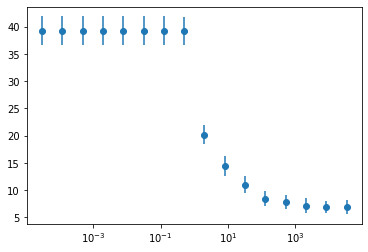

d = 2


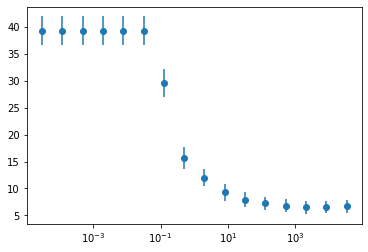

d = 3


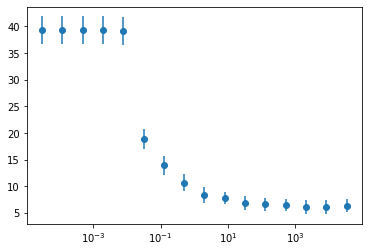

d = 4


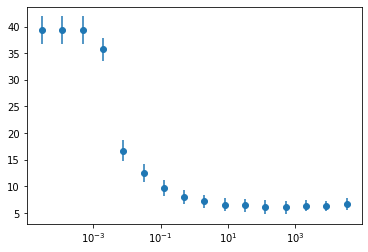

In [15]:
for i, df in enumerate(dfs):
    print(f'd = {i + 1}')
    plot_df(df)

Из предыдущих графиков видно, что ошибка минимизируется при полиноме 3 степени и цене ошибки = 2048. Запустим отдельно обучение на всей тренировочной выборке при фиксированном С=2048 и сохраним среднюю ошибку и количество опорных векторов в зависимости от степени полинома

In [6]:
with open('results2.json', 'r') as f:
    res2 = json.load(f)
df2 = pd.DataFrame(res2)
df2

,d,err,v_cnt
0,1,7.993050,774
1,2,7.732407,670
2,3,6.863597,627
3,4,6.950478,529


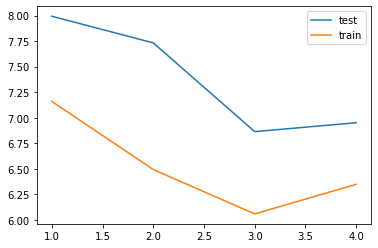

In [20]:
plt.plot(df2['d'], df2['err'], label='test')
plt.plot(df2['d'], [e['err'].values[0] for e in [df[df['c'] == 2048] for df in dfs]], label='train')
plt.legend(loc='upper right')
plt.show()

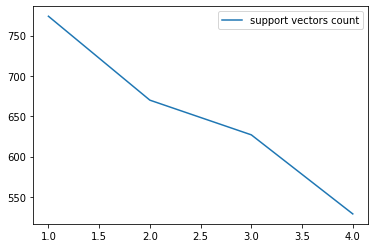

In [23]:
plt.plot(df2['d'], df2['v_cnt'], label='support vectors count')
plt.legend(loc='upper right')
plt.show()

На первом графике видим довольно объяснимую статистику - полиномов малых степеней не достаточно, чтобы более-менее точно разделить тренировочную выборку, однако полином 4 степени оказался излишним и добавил ошибку. Можно предположить, что границу множеств можно описать полиномом 3 степени максимально точно (однако, стоит заметить, что выбранный заведомо свободный коэффициент мог повлиять на поведение графиков). Разный же характер поведения графиков не играет особой роли, так как мы оцениваем ошибку не на обучающей, а на валидационной и тестовой выборках.

Количество же опорных векторов становится меньше с повышением степени полинома, т.е. уменьшается количество точек, которые мы считаем выбросами. Следовательно, полином большой степени точнее разделил выборку, однако, изходя из графиков ошибок можно дополнительно предположить, что это приводит к переобучению.